In [1]:
!pip install Quandl

In [337]:
import pandas as pd
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
import quandl
from sklearn.linear_model import LinearRegression

In [310]:
quandl.ApiConfig.api_key = 'LHyoML5rwRpuVgN2nD-X'
stock_data = quandl.get('NSE/TCS', start_date='2018-07-01', end_date='2018-07-31')
print(stock_data)

               Open     High      Low     Last    Close  Total Trade Quantity  \
Date                                                                            
2018-07-02  1852.00  1857.80  1841.10  1854.05  1851.35             2650290.0   
2018-07-03  1859.95  1879.90  1857.05  1874.25  1874.05             3242233.0   
2018-07-04  1879.90  1879.90  1857.15  1867.00  1866.15             2700614.0   
2018-07-05  1873.00  1887.50  1862.10  1883.80  1880.30             2472571.0   
2018-07-06  1882.85  1921.00  1881.65  1917.75  1912.95             3713781.0   
2018-07-09  1924.00  1924.40  1876.50  1884.20  1883.00             6151747.0   
2018-07-10  1898.00  1898.90  1870.75  1876.05  1875.10             5303302.0   
2018-07-11  1900.00  1998.00  1894.15  1970.00  1979.90            22903802.0   
2018-07-12  1984.00  1990.90  1960.50  1973.00  1971.35             6921701.0   
2018-07-13  1975.00  1997.90  1974.00  1977.60  1981.10             4148185.0   
2018-07-16  1990.00  1996.00

In [236]:
dataset = pd.DataFrame(stock_data)

In [238]:
dataset.head()
dataset.to_csv('TCS.csv')

In [240]:
data = pd.read_csv('TCS.csv')

In [242]:
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-07-02,1852.00,1857.8,1841.10,1854.05,1851.35,2650290.0,49083.43
1,2018-07-03,1859.95,1879.9,1857.05,1874.25,1874.05,3242233.0,60699.85
2,2018-07-04,1879.90,1879.9,1857.15,1867.00,1866.15,2700614.0,50328.86
3,2018-07-05,1873.00,1887.5,1862.10,1883.80,1880.30,2472571.0,46344.08
4,2018-07-06,1882.85,1921.0,1881.65,1917.75,1912.95,3713781.0,70846.08


In [244]:
data.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [246]:
x = data.loc[:,'High':'Turnover (Lacs)']
y = data.loc[:,'Open']

In [248]:
x.head()

,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,1857.8,1841.10,1854.05,1851.35,2650290.0,49083.43
1,1879.9,1857.05,1874.25,1874.05,3242233.0,60699.85
2,1879.9,1857.15,1867.00,1866.15,2700614.0,50328.86
3,1887.5,1862.10,1883.80,1880.30,2472571.0,46344.08
4,1921.0,1881.65,1917.75,1912.95,3713781.0,70846.08


In [250]:
y.head()

0    1852.00
1    1859.95
2    1879.90
3    1873.00
4    1882.85
Name: Open, dtype: float64

In [361]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.1,random_state=0)

In [363]:
lr = LinearRegression()

In [365]:
lr.fit(x_train.values,y_train.values)

LinearRegression()

In [367]:
lr.score(x_test.values,y_test.values)

0.9477154788140246

In [369]:
print("w parameter: ",lr.coef_)
print("b parameter: ",lr.intercept_)

w parameter:  [ 1.05115112e+00  9.48761192e-01 -4.76267046e-02 -8.52625494e-01
  6.15948462e-05 -3.21444199e-03]
b parameter:  -189.82337804481813


In [371]:
Test_data = [[2017.0 ,1979.6 ,1990.00 ,1992.70 ,2321216.0 ,46373.71]]
testdata = pd.DataFrame(Test_data)
prediction = lr.predict(testdata)

In [373]:
print(prediction)

[2008.62146975]


In [375]:
y_train_pred = lr.predict(x_train.values)
y_test_pred = lr.predict(x_test.values)

In [442]:
from sklearn.metrics import mean_squared_error

In [444]:
rmse = np.sqrt(mean_squared_error(y_test,y_test_pred))
print(rmse)

4.814880360059467


In [390]:
from sklearn.metrics import r2_score
r2_score(y_test,y_test_pred)

0.9477154788140246

Text(0.5, 1.0, 'Actual vs Predicted')

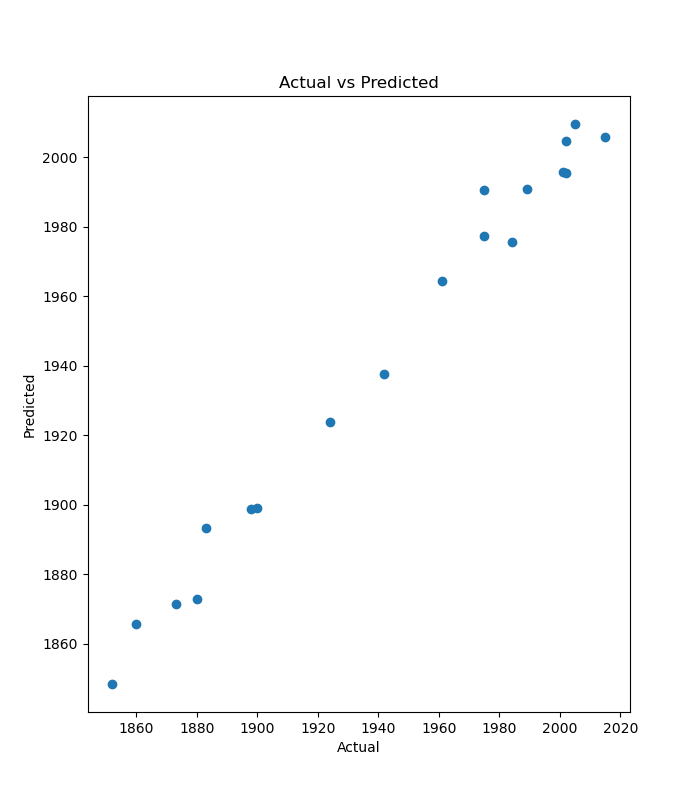

In [396]:
import matplotlib.pyplot as plt
plt.figure(figsize = (7,8))
plt.scatter(y_train,y_train_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

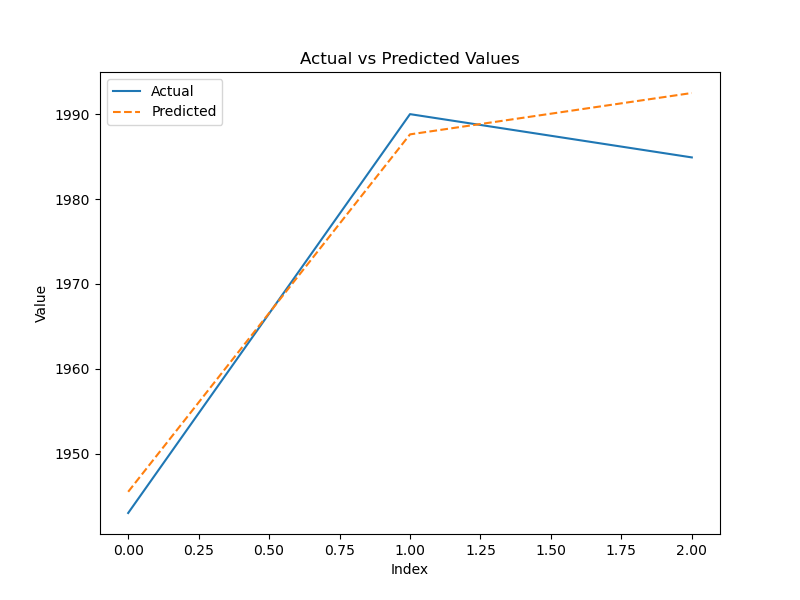

In [432]:
plt.figure(figsize=(8, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_test_pred, label='Predicted', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()


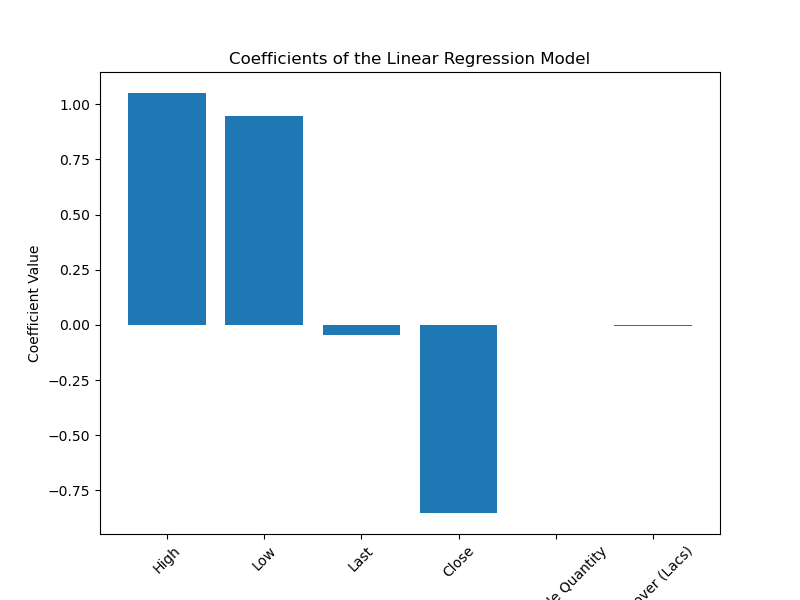

In [434]:
plt.figure(figsize=(8, 6))
plt.bar(x.columns, lr.coef_)
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Coefficients of the Linear Regression Model')
plt.xticks(rotation=45)
plt.show()


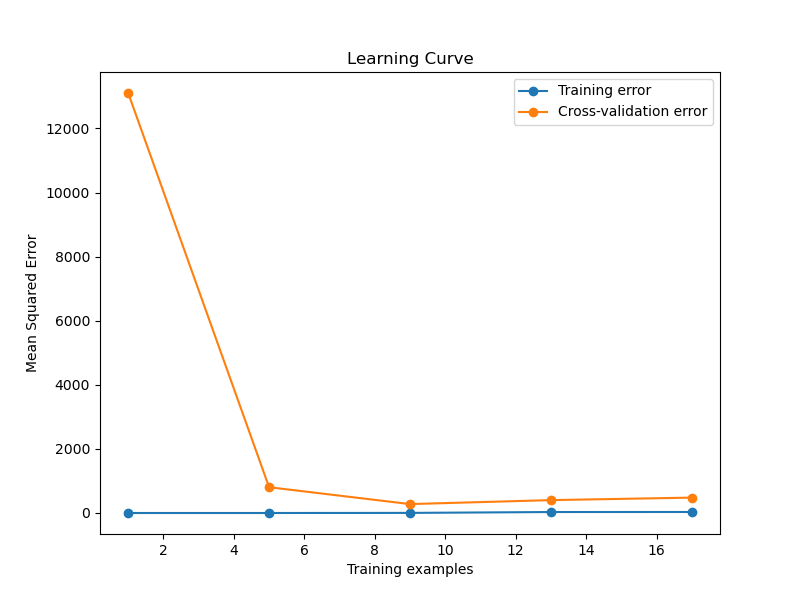

In [436]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(lr, x, y, cv=5, scoring='neg_mean_squared_error')

train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', label='Training error')
plt.plot(train_sizes, test_scores_mean, 'o-', label='Cross-validation error')
plt.xlabel('Training examples')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curve')
plt.legend()
plt.show()

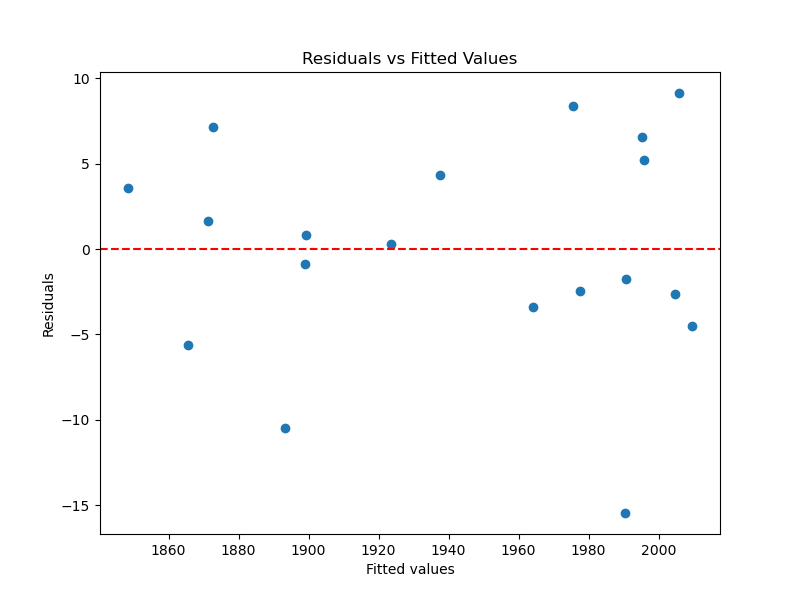

In [438]:
fitted_values = lr.predict(x_train.values)
residuals = y_train - fitted_values

plt.figure(figsize=(8, 6))
plt.scatter(fitted_values, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()
